# Programming for Data Analysis

## Project 1 - Analysis of Games Sales on PS4 to date.

#### Author: Sean Elliott
#### Student Number: G00411288
#### Lecturer: Dr Brian McGinley 

****

In [168]:
# Importing libraries for analysis

import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt 

# define location of dataset to pull data from - had to create own folder on github with the required data as couldnt scrape from the webiste.

games = pd.read_csv('https://raw.githubusercontent.com/SeanE15/Programming-for-Data-Analysis/main/Assignment%201/Dataset/vgsales.csv')

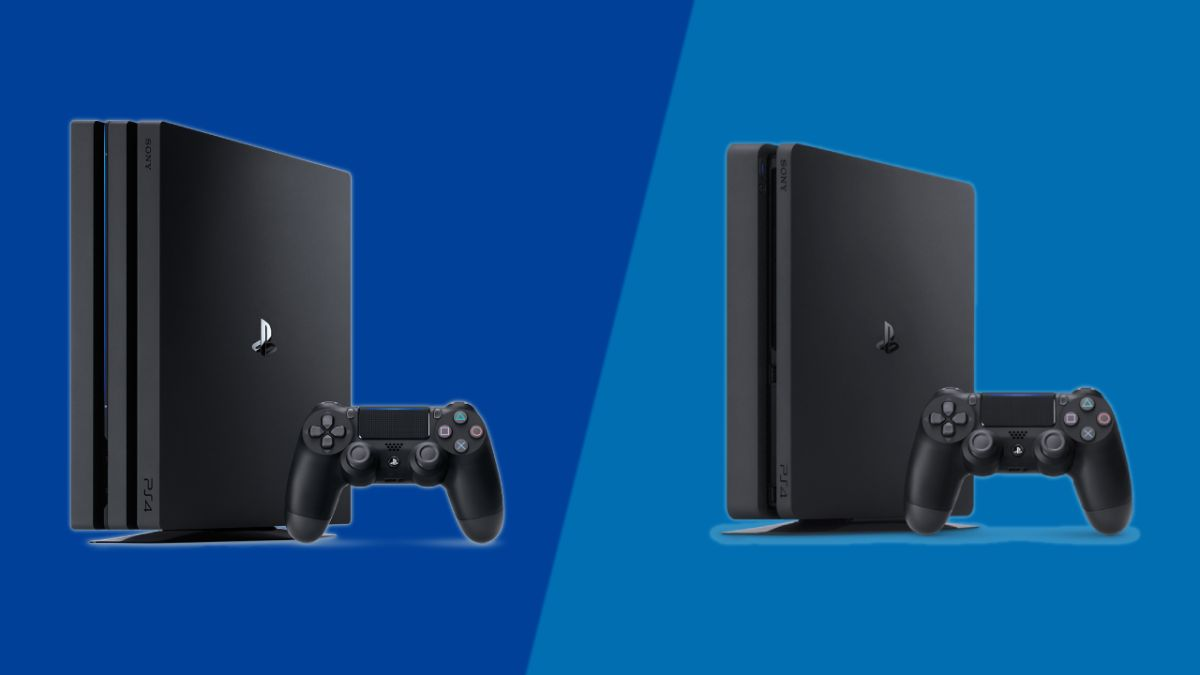


# Introduction

*****

For this project I will be analysing data from a PS4 dataset. This dataset includes a few descriptions of note - name of the game, genre of the game, year of production, date of release, length it takes for the average player to complete the game, publisher/developer popularity and also game size. This [dataset](https://www.kaggle.com/datasets/shivamb/all-playstation-4-games) and it's subsequent information have been scraped from [True Trophies](https://www.truetrophies.com/). This dataset is licensed under GPL 2.

In [169]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


 For ease of access I will now clean the dataset - to remove unwanted data.

In [170]:
# ask the program to print the list of columns so that I can discern which data I want to analyse and which is extrenuous material.

games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [171]:
# ask the program to remove any unnessecary columns which will not help my analysis.

games = games.drop(columns = ['Rank'])

In [172]:
games.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [173]:
games["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [174]:
games["Publisher"].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [175]:
games["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [176]:
#sns.set_style("darkgrid")
#sns.pairplot(games,hue="Genre")
#plt.show()


 Now that I have cleaned the data set and figured out what information is in the set - I will start to analyse it further. 
 The first quesiton I will ask, based on the dataset, is which region had the most sales?

In [177]:
# I start by using the mean() function to find the average sales in the specific regions. The mean vaule must be multiplied
# by 1 million in order for the results to be shown in the millions.
# I then ask the program to print the results using an f'string and ask it to show me the answer correct to 3 decimal places. 

a = (games['EU_Sales'].mean()*1000000)
b = (games['JP_Sales'].mean()*1000000)
c = (games['NA_Sales'].mean()*1000000)
d = (games['Other_Sales'].mean()*1000000)
e = (games['Global_Sales'].mean()*1000000)

print('The average sales in Europe =', (F"${a:,.3f}"))
print('The average sales in Japan =', (F"${b:,.3f}"))
print('The average sales in North America =', (F"${c:,.3f}"))
print('The average sales in other regions =', (F"${d:,.3f}"))
print('The average Global sales =', (F"${e:,.3f}"))

The average sales in Europe = $146,652.006
The average sales in Japan = $77,781.660
The average sales in North America = $264,667.430
The average sales in other regions = $48,063.020
The average Global sales = $537,440.656


The findings above clearly show that North America is the most profitable market for selling video games based off the 
information from the dataset. I now want to show this in a more visually appealing way below:

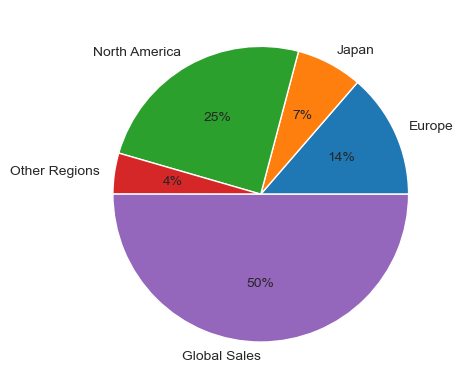

In [178]:
# I make a pie chart to show the results. I create two lists - the regions for sales and also the sales totals.
# I then plot these on pie chart.

data = [146652.006, 77781.660, 264667.430, 48063.020, 537440.656]
labels = ['Europe', 'Japan', 'North America', 'Other Regions', 'Global Sales']

# the (autopct='%.0f%%') allows me to show the percentage values on the pie chart
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()


As we can see fromt he piechart above, although North America appears ot be the most profitable single region for selling video games, none of the other regions (NA included) can match the global sales overall.